In [3]:
import os
import zipfile

local_zip = 'E:/Work/JUPYTER/archive'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/JUPYTER/')
zip_ref.close()

local_zip = '/JUPYTER/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/JUPYTER/')
zip_ref.close()

PermissionError: [Errno 13] Permission denied: 'E:/Work/JUPYTER/archive'

In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import os

rock_dir = os.path.join('C:/Work/JUPYTER/archive/rock')
paper_dir = os.path.join('C:/Work/JUPYTER/archive/paper')
scissors_dir = os.path.join('C:/Work/JUPYTER/archive/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
['00nKV8oHuTGi20gq.png', '01dM3ewPIsnBICu1.png', '02vG75hQW9Vp4oTl.png', '0bioBZYFCXqJIulm.png', '0NDYNEoDui7o64gU.png', '0OEXfEooCXlljaEl.png', '0P6uxM8Vr1DwySHe.png', '19H63c0MWD56EWNq.png', '1BqjHe5igJAgUjiN.png', '1COBZEE1ALiJIivQ.png']
['04l5I8TqdzF9WDMJ.png', '0a3UtNzl5Ll3sq8K.png', '0cb6cVL8pkfi4wF6.png', '0eqArS2GgsBeqgSn.png', '0Og76sl5CJhbxWWx.png', '0RA9rcrv8iVvuDDU.png', '0t08v9bAaA0mXGCQ.png', '0Uomd0HvOB33m47I.png', '0vugygEjxQJPr9yz.png', '0zKU6wEhT2cDe9j0.png']
['0657zSfiTYzP2jrl.png', '0CSaM2vL2cWX6Cay.png', '0ePX1wuCc3et7leL.png', '0Flw60Z2MAWWKn6S.png', '0Ug54ifXRqqlZS2Z.png', '0zoQAmDFXehOZsAp.png', '138Tx9KlEfheT3uB.png', '17HZDUFSVPxcar99.png', '1CXgK9fgGdSRggD9.png', '1i1dlQrE6JnhYXE4.png']


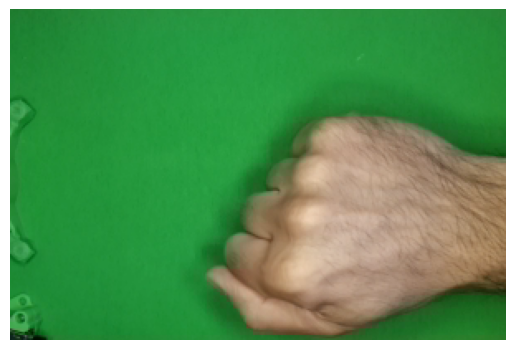

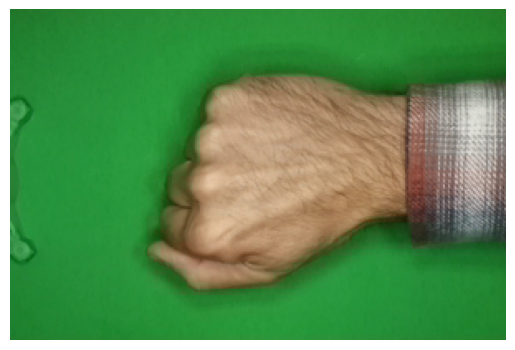

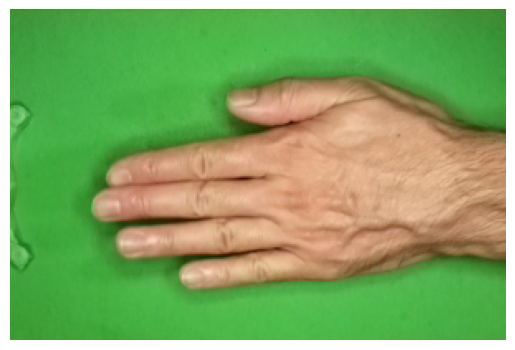

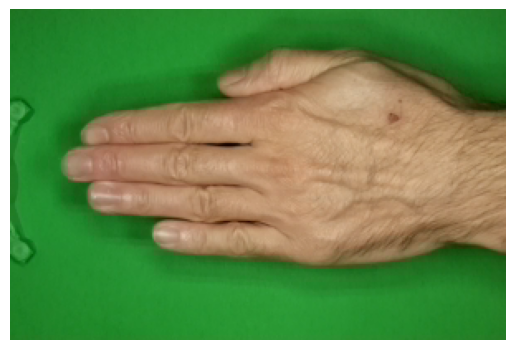

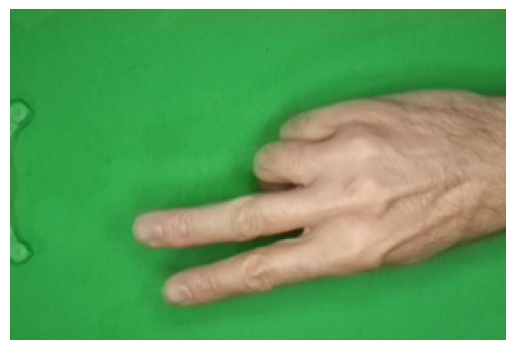

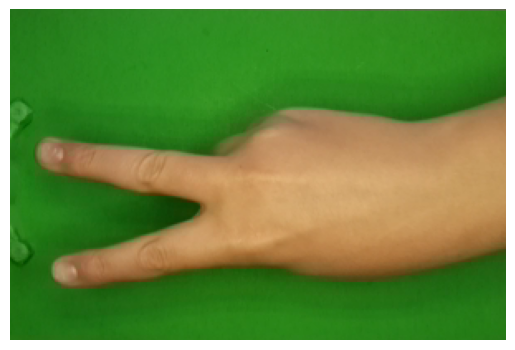

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import scipy

TRAINING_DIR = "C:/Work/JUPYTER/archive"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Work/JUPYTER/rps-cv-images"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

logdir = 'C:\Work\Python\Images\logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

#history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

history = model.fit(train_generator, epochs=25,  validation_data = validation_generator, verbose = 1, validation_steps=3)

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                    

In [7]:
model.save("rps.h5")

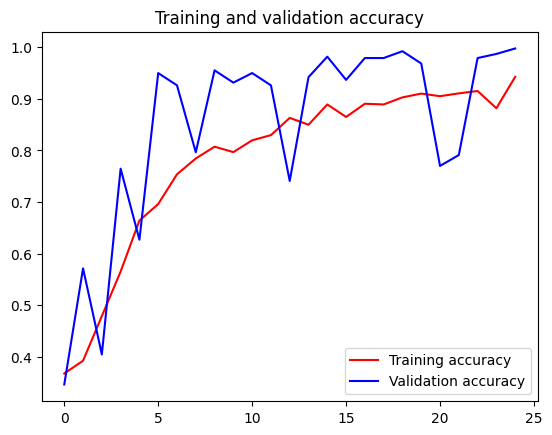

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)